# Task 2: Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

In [2]:
#Importing useful libraries:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing Dataset fromt the given link:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
#Printing first 5 rows of Dataset:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Printing last 5 rows of Dataset:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#evaluating basic statistics of the dataset:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# concise summary of the dataframe:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Visualizing Dataset

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

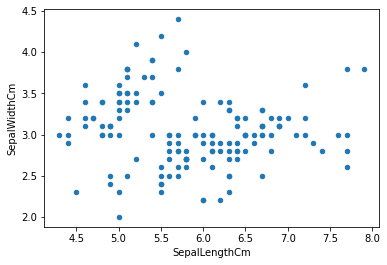

In [8]:
# Plotting scatter plot for the dataset:
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

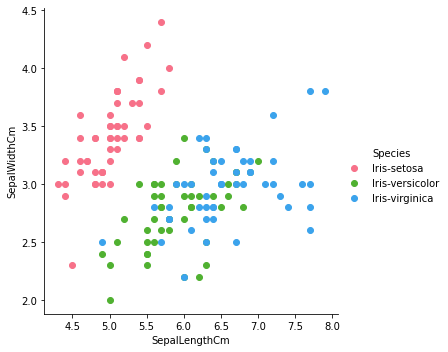

In [9]:
# Differentiating scatter plot as per species mentioned in the dataset:
sns.FacetGrid(data, hue="Species", palette="husl", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

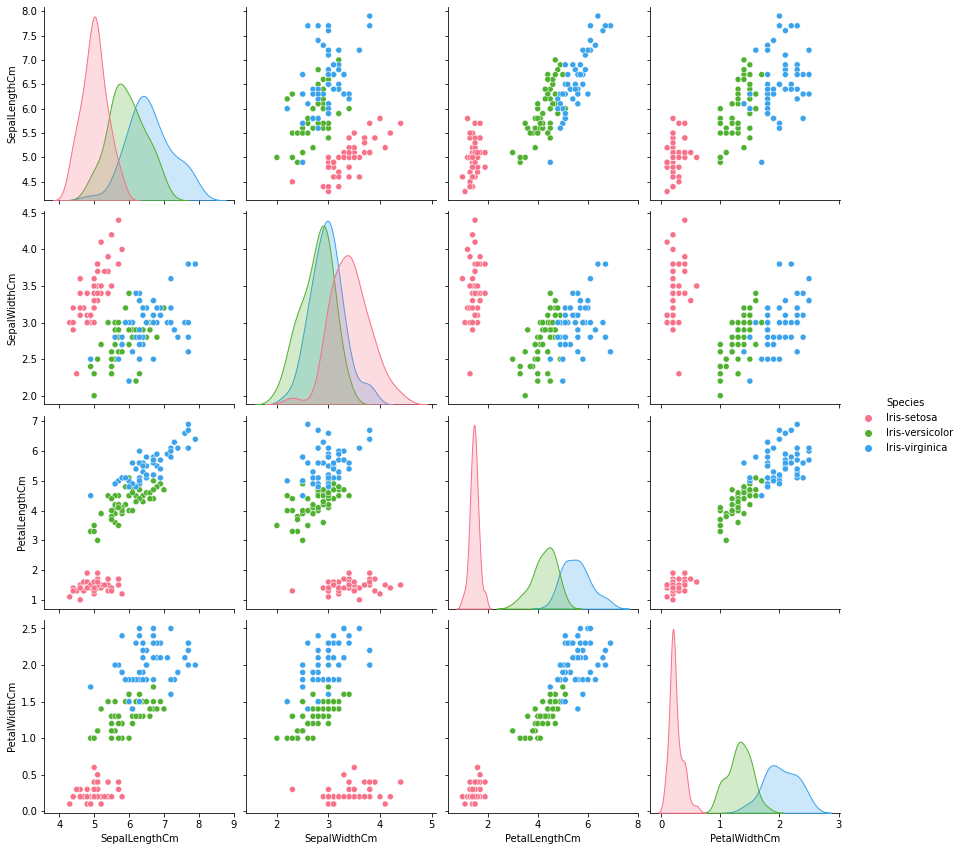

In [10]:
# Plotting pairplot for various columns in the dataset:
sns.pairplot(data.drop("Id", axis=1), hue="Species", palette="husl", size=3)

In [11]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Preparing Data by taking Petal Length and Petal width into consideration

In [12]:
data=data.drop(['Id'], axis = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
feat=data.iloc[:,[2,3]]
feat

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

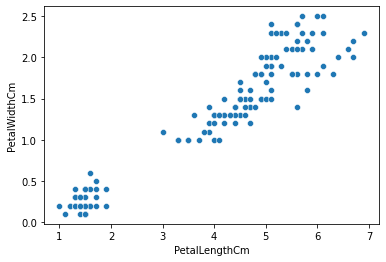

In [14]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=feat)

In [15]:
# Scaling Dataset:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(feat)
data_transformed=mms.transform(feat)

# Finding optimal number of clusters

In [16]:
from sklearn.cluster import KMeans
sum_square_distance=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(data_transformed)
    sum_square_distance.append(kmeans.inertia_)

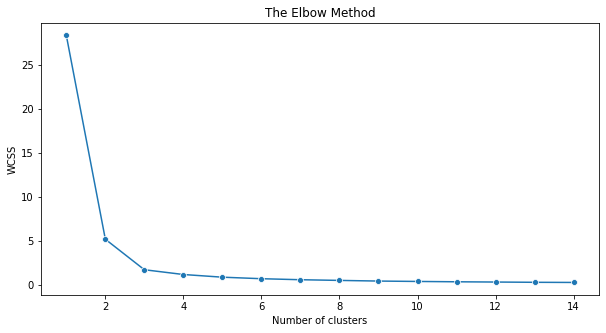

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,15), y=sum_square_distance, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Plotting the scatter plot with clusters for K=3 

At k=3 elbow appears indicating optimal number of clusters is 3

In [18]:
kmeans3=KMeans(n_clusters=3)
kmeans3=kmeans3.fit(feat)
print(kmeans3.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


In [19]:
result=pd.DataFrame(kmeans3.labels_, columns=['clusters'])
result.groupby('clusters').size()

clusters
0    48
1    50
2    52
dtype: int64

In [20]:
centroids = kmeans3.cluster_centers_
centroids=pd.DataFrame(centroids,columns=['Centroid_Petal Length','Centroid_Petal Width'])
centroids

,Centroid_Petal Length,Centroid_Petal Width
0,5.595833,2.037500
1,1.464000,0.244000
2,4.269231,1.342308


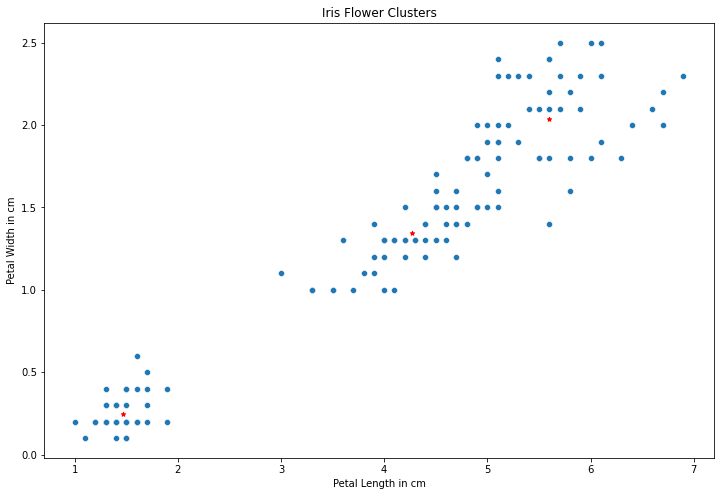

In [38]:
plt.figure(figsize=(12,8))

s=sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=feat, legend='brief')
centroids.plot(ax=s, kind='scatter', x='Centroid_Petal Length', y='Centroid_Petal Width', color='red', marker='*')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.show()

# Predicting clusters for different values of Sepal Length and Sepal Width

In [22]:
cluster_pred=kmeans3.predict([[1.5,0.6],[6.1,2.2],[4.2,1.7]])
cluster_pred

array([1, 0, 2])

Result: Our model is suitable for making such predictions of clusters based on input data